In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('AAPL.csv')

In [3]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-07-18 00:00:00+00:00,99.83,100.13,98.600,98.70,36493867,23.311648,23.381702,23.024426,23.047777,145975468,0.0,1.0
1,AAPL,2016-07-19 00:00:00+00:00,99.87,100.00,99.340,99.56,23779924,23.320988,23.351345,23.197226,23.248599,95119696,0.0,1.0
2,AAPL,2016-07-20 00:00:00+00:00,99.96,100.46,99.735,100.00,26275968,23.342004,23.458761,23.289464,23.351345,105103872,0.0,1.0
3,AAPL,2016-07-21 00:00:00+00:00,99.43,101.00,99.130,99.83,32702028,23.218242,23.584858,23.148188,23.311648,130808112,0.0,1.0
4,AAPL,2016-07-22 00:00:00+00:00,98.66,99.30,98.310,99.26,28313669,23.038437,23.187885,22.956707,23.178545,113254676,0.0,1.0


In [4]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-07-09 00:00:00+00:00,145.11,145.65,142.6522,142.75,99890800,145.11,145.65,142.6522,142.75,99890800,0.0,1.0
1254,AAPL,2021-07-12 00:00:00+00:00,144.50,146.32,144.0000,146.21,76299719,144.50,146.32,144.0000,146.21,76299719,0.0,1.0
1255,AAPL,2021-07-13 00:00:00+00:00,145.64,147.46,143.6300,144.03,100827099,145.64,147.46,143.6300,144.03,100827099,0.0,1.0
1256,AAPL,2021-07-14 00:00:00+00:00,149.15,149.57,147.6800,148.10,127050785,149.15,149.57,147.6800,148.10,127050785,0.0,1.0
1257,AAPL,2021-07-15 00:00:00+00:00,148.48,150.00,147.0900,149.24,106820297,148.48,150.00,147.0900,149.24,106820297,0.0,1.0


In [5]:
df1=df.reset_index()['close']

In [6]:
df1.shape

(1258,)

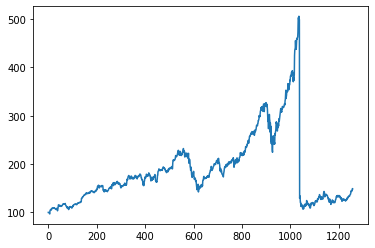

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
df1

0        99.83
1        99.87
2        99.96
3        99.43
4        98.66
         ...  
1253    145.11
1254    144.50
1255    145.64
1256    149.15
1257    148.48
Name: close, Length: 1258, dtype: float64

In [9]:
import numpy as np

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1

array([[0.00771824],
       [0.00781593],
       [0.00803576],
       ...,
       [0.11960823],
       [0.12818133],
       [0.12654487]])

In [12]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(880, 378)

In [14]:
train_data

array([[0.00771824],
       [0.00781593],
       [0.00803576],
       [0.00674124],
       [0.00486053],
       [0.00163646],
       [0.        ],
       [0.01533877],
       [0.01873382],
       [0.0184163 ],
       [0.02291046],
       [0.01907577],
       [0.02227541],
       [0.02247081],
       [0.0264032 ],
       [0.02857701],
       [0.0296517 ],
       [0.02767329],
       [0.02750232],
       [0.02811294],
       [0.03128816],
       [0.03104392],
       [0.03065312],
       [0.03031117],
       [0.03099507],
       [0.02891896],
       [0.0297494 ],
       [0.02774657],
       [0.02662303],
       [0.02508427],
       [0.02479117],
       [0.02278833],
       [0.02303258],
       [0.02457134],
       [0.02701382],
       [0.02694055],
       [0.02855259],
       [0.02161594],
       [0.01577842],
       [0.02142055],
       [0.02755117],
       [0.03688144],
       [0.04616286],
       [0.04457525],
       [0.04130233],
       [0.04127791],
       [0.04122906],
       [0.043

In [15]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [17]:
X_train.shape , y_train.shape

((779, 100), (779,))

In [18]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
x_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 4s 102ms/step - loss: 0.0153 - accuracy: 0.0000e+00 - val_loss: 0.0361 - val_accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 37ms/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 0.0264 - val_accuracy: 0.0036
Epoch 3/100
13/13 [==============================] - 0s 37ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0225 - val_accuracy: 0.0036
Epoch 4/100
13/13 [==============================] - 0s 37ms/step - loss: 5.7767e-04 - accuracy: 0.0000e+00 - val_loss: 0.0255 - val_accuracy: 0.0036
Epoch 5/100
13/13 [==============================] - 0s 38ms/step - loss: 4.7899e-04 - accuracy: 0.0000e+00 - val_loss: 0.0262 - val_accuracy: 0.0036
Epoch 6/100
13/13 [==============================] - 0s 38ms/step - loss: 4.0507e-04 - accuracy: 0.0000e+00 - val_loss: 0.0239 - val_accuracy: 0.0036
Epoch 7/100
13/13 [==============================] - 0s 38ms/step - loss: 3.8872e-04 - accuracy: 0.0000e+00

13/13 [==============================] - 1s 39ms/step - loss: 2.0430e-04 - accuracy: 0.0000e+00 - val_loss: 0.0141 - val_accuracy: 0.0036
Epoch 56/100
13/13 [==============================] - 0s 37ms/step - loss: 1.8280e-04 - accuracy: 0.0000e+00 - val_loss: 0.0141 - val_accuracy: 0.0036
Epoch 57/100
13/13 [==============================] - 0s 36ms/step - loss: 1.8405e-04 - accuracy: 0.0000e+00 - val_loss: 0.0136 - val_accuracy: 0.0036
Epoch 58/100
13/13 [==============================] - 0s 34ms/step - loss: 1.6689e-04 - accuracy: 0.0000e+00 - val_loss: 0.0132 - val_accuracy: 0.0036
Epoch 59/100
13/13 [==============================] - 0s 35ms/step - loss: 1.6184e-04 - accuracy: 0.0000e+00 - val_loss: 0.0127 - val_accuracy: 0.0036
Epoch 60/100
13/13 [==============================] - 0s 34ms/step - loss: 1.6255e-04 - accuracy: 0.0000e+00 - val_loss: 0.0139 - val_accuracy: 0.0036
Epoch 61/100
13/13 [==============================] - 0s 36ms/step - loss: 1.6476e-04 - accuracy: 0.0000e+0

In [34]:
model.evaluate(x_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [35]:
import tensorflow as tf

In [36]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [37]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

186.0621766422917

In [40]:
math.sqrt(mean_squared_error(y_test,test_predict))

229.92504060621735

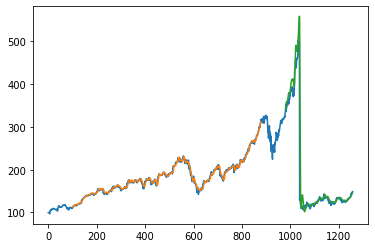

In [41]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [42]:
len(test_data)

378

In [43]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [44]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [45]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.12331288]
101
1 day input [0.07005032 0.0594011  0.06006057 0.07600997 0.06948854 0.06201456
 0.05730057 0.06045137 0.04809242 0.05963314 0.0569342  0.06177031
 0.0594988  0.06672854 0.07058766 0.06860925 0.05827756 0.05695862
 0.06526306 0.06318695 0.05720287 0.05842411 0.05993845 0.0603781
 0.0567388  0.06223438 0.06431049 0.07139368 0.07215085 0.07627864
 0.08228714 0.08872307 0.08443652 0.09222803 0.08636608 0.092399
 0.09156856 0.09322945 0.08900396 0.08995652 0.08614626 0.09195936
 0.09293635 0.09213033 0.09015192 0.08990767 0.08497387 0.08761174
 0.07615651 0.07676713 0.0807728  0.08192077 0.07371403 0.0714181
 0.06374872 0.06912217 0.07517952 0.0722974  0.06882908 0.06843828
 0.07483758 0.07024571 0.07432465 0.07383616 0.07371403 0.06987934
 0.06824288 0.06743686 0.069342   0.06562943 0.07136925 0.07139368
 0.07344536 0.07439793 0.0719066  0.07493527 0.08258024 0.08052855
 0.08177422 0.08577988 0.08253139 0.08702555 0.09112891 0.09044502
 0.0897367  0.08900396 0.0930829  0.0

12 day output [[0.13355555]]
13 day input [0.0594988  0.06672854 0.07058766 0.06860925 0.05827756 0.05695862
 0.06526306 0.06318695 0.05720287 0.05842411 0.05993845 0.0603781
 0.0567388  0.06223438 0.06431049 0.07139368 0.07215085 0.07627864
 0.08228714 0.08872307 0.08443652 0.09222803 0.08636608 0.092399
 0.09156856 0.09322945 0.08900396 0.08995652 0.08614626 0.09195936
 0.09293635 0.09213033 0.09015192 0.08990767 0.08497387 0.08761174
 0.07615651 0.07676713 0.0807728  0.08192077 0.07371403 0.0714181
 0.06374872 0.06912217 0.07517952 0.0722974  0.06882908 0.06843828
 0.07483758 0.07024571 0.07432465 0.07383616 0.07371403 0.06987934
 0.06824288 0.06743686 0.069342   0.06562943 0.07136925 0.07139368
 0.07344536 0.07439793 0.0719066  0.07493527 0.08258024 0.08052855
 0.08177422 0.08577988 0.08253139 0.08702555 0.09112891 0.09044502
 0.0897367  0.08900396 0.0930829  0.09686874 0.0984075  0.09916467
 0.10573494 0.11076645 0.11699477 0.11374628 0.11831371 0.1168238
 0.11960823 0.12818133 0.

23 day output [[0.14376162]]
24 day input [0.0603781  0.0567388  0.06223438 0.06431049 0.07139368 0.07215085
 0.07627864 0.08228714 0.08872307 0.08443652 0.09222803 0.08636608
 0.092399   0.09156856 0.09322945 0.08900396 0.08995652 0.08614626
 0.09195936 0.09293635 0.09213033 0.09015192 0.08990767 0.08497387
 0.08761174 0.07615651 0.07676713 0.0807728  0.08192077 0.07371403
 0.0714181  0.06374872 0.06912217 0.07517952 0.0722974  0.06882908
 0.06843828 0.07483758 0.07024571 0.07432465 0.07383616 0.07371403
 0.06987934 0.06824288 0.06743686 0.069342   0.06562943 0.07136925
 0.07139368 0.07344536 0.07439793 0.0719066  0.07493527 0.08258024
 0.08052855 0.08177422 0.08577988 0.08253139 0.08702555 0.09112891
 0.09044502 0.0897367  0.08900396 0.0930829  0.09686874 0.0984075
 0.09916467 0.10573494 0.11076645 0.11699477 0.11374628 0.11831371
 0.1168238  0.11960823 0.12818133 0.12654487 0.12331288 0.12504043
 0.12617531 0.12693956 0.12753597 0.12809685 0.12869182 0.12934995
 0.13007808 0.1308723

In [46]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [48]:
len(df1)

1258

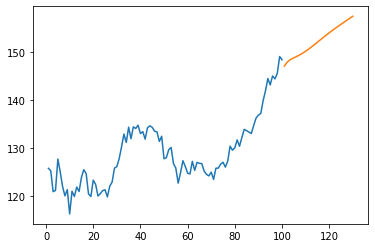

In [50]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

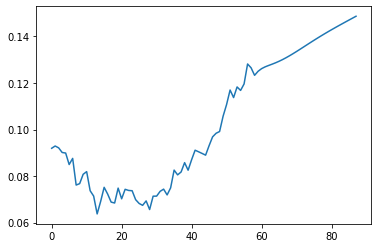

In [51]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [52]:
df3=scaler.inverse_transform(df3).tolist()

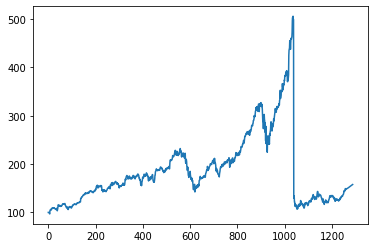

In [53]:
plt.plot(df3)